In [7]:
from PIL import Image
from docx2pdf import convert
from bs4 import BeautifulSoup as soup
import cv2
import pytesseract as tess
import numpy as np
import docx
import matplotlib.pyplot as plt

In [2]:
#opening image with pillow
im_file = "br_pt_n1_1899.jpeg" #é aqui que é o input
im = Image.open(im_file)

#image object
print(im) 

#for image size
print(im.size) 

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=831x1200 at 0x10D816640>
(831, 1200)


In [3]:
#to showcase image

im.show() 

In [9]:
#rotates image 90 degrees
im_rot = im.rotate(90) 
im_rot.show()

#or

#rotates image 180 degrees and displays it
im.rotate(180).show() 

In [4]:
#save the file in a temp directory previously created
#for storing temporary images while preprocessing them for OCR
im.save("temp/br_pt_n1_1899.jpeg") 

In [8]:
#opening image with cv2

image_file = "br_pt_n1_1899.jpeg"
img = cv2.imread(image_file)

In [ ]:
#showing image with opencv (cv2)

cv2.imshow("original image", img)
cv2.waitKey(0) #in miliseconds; 0 means no time

In [10]:
#extract text from image with pytesseract
#text = tess.image_to_string(Image.open(im_file), lang="por")
text = tess.image_to_string(Image.open(image_file), lang="por")
print(text)
print(type(text))

 

 

2 BRASIL — PORTUGAL

A NOSSA APRESENTAÇÃO

asce o “Brasil-Portugal um mez depois de nascer o
anno, € pouco antes de expirar o seculo. Vem ao
mundo n'tm momento convulsionado, eriçado de proble-
mas. Não apparece no mez das flores, n'aquelle em que o
Destino costuma fazer brotar os poetas € as rosas. Ao
contrario, vem n'uma epoca triste, em que à invernia bate
rijo á porta, e as arvores seccas e hirtas teem um ar de pa-
vor. Para que não pudesse ser mais desolador o horoscopo
bastava que o Brasil-Portugal viesse à luz numa sexta-
feira, 13. E, comtudo, surge, vem á lica, desce á estacada,
afronta os maus agoiros, entra denodado n grande batalha.
da vida, é entrega-se confiado á boa fada tutelar que nunca
desampara os que trazem. comsigo uma ideia e uma yon-
tade, Qual é essa vontade? Qual é essa ideia
Responder à estas perguntas é dizer todo um programma,
é, como elle é simples e curto, em duas palavras se diz.
A ideia é esta: tornar o Brasil conhecido em Portugal,
tornar Portugal

In [29]:
#create a doc x with text from image with docx
#and save it on the project directory

document = docx.Document() 
p = document.add_paragraph(text)
document.save('output.docx')

In [39]:
#convert a single docx file to a searchable pdf file in same directory

convert("output.docx")

  0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
#URL Input image to text DOCX

import requests
image_url = 'http://casacomum.org/aebdocs/05/05739/05739.003.00590/d2/05739.003.00590_p0001_id000645202_D2.png'

img_data = requests.get(image_url).content
with open('image_name.jpg', 'wb') as handler:
    handler.write(img_data)

    
print(img_data)
#text = tess.image_to_string(Image.open("image_name.jpg"), lang="por")

#por as funções num helper.py para depois as funções serem chamadas para a flask app
#esta returns o text que depois é displayed in a new tab called output.

#document = docx.Document() 
#p = document.add_paragraph(text)
#document.save('output_DL.docx')



b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x0c\xc0\x00\x00\x12j\x01\x00\x00\x00\x008{|\x02\x00\x00\x00\x02bKGD\x00\x01\xdd\x8a\x13\xa4\x00\x00\x00\tpHYs\x00\x00.#\x00\x00.#\x01x\xa5?v\x00\x00\x00\tvpAg\x00\x00\x0c\xc0\x00\x00\x12j\x00C*=\xfa\x00\x00\x80\x00IDATx\xda\xd4\xfd\r\x9c\x1d\xc7u\x1f\nV\xdf;\x9c;\x14\x87\xe8\xa1\xe8g\x0eE\x10=2\x1d\xc9\xd9x\x8d\x91\xe5\x17B&\x88\x1e\x9a\x8e\xe8\xfc\xe25\x95\xcd\xee\xdao\xe3g\x8c,?\xd3\xd98\x06dzM0\x04\xd1\r\x82\x11\xe4X\xd6\xd0\xcf\xbf]\xd1O\xb2.\x1c\xe5\xc5\xfem\xf2{\xa4\xd7\xbbk)\x92\xd9\rA\xe6\xc8\xd1\xc7\x85\xa3\xe4\x91\x8a(t\x83\xa08\x94\x05\xb1\x1b\x1c\x8a\xb7\x07\xb7o\xd7\xd6\xa9\xef\xea\x8f\xfb13\xa0\xf3\x8a\xc4\x9d\xfe\xa8\xae:u\xfeuN\x9d\xfa:\x85\xf0\xb5\x08\xfdk\x92*\r\xc3\x1d\x12\x13\x95\x1e\r\x9a?\xfc\x18\xfb\xe3\xc9\x07\xd9\r\xd5H\x05\xfdM\xb6_\xa0\xc2\x96\x97W\xf0\xcb"\xb3-\xb4C>\x91\xd05\xee\x82\x9d\'\xb8\xbd\xf2M\x18/\x99\xaa`\x9e\xf1 \xb6\xaf\x01\xe1\x99+//\xe2\xd7D\x86\xf9.\x00\xf3&\x86FI,\xa6\xff\xa4&x\xe6m\xaf\xfc>\xbe}

### Preprocessing images for better OCR



In [6]:
# INVERTING IMAGE (like a photo negative)

inverted_image = cv2.bitwise_not(img)
cv2.imwrite("temp/inverted.jpg", inverted_image)

NameError: name 'img' is not defined

In [ ]:
display("temp/inverted.jpg")

In [ ]:
# BINARIZATION (b&w for better OCR)

    #first you change it into a grayscale

def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_image = grayscale(img)
cv2.imwrite("temp/gray.jpg", gray_image)

In [ ]:
display("temp/gray.jpg")

In [ ]:
    #then into binary (b&w)

thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image.jpg", im_bw)

In [ ]:
display("temp/bw_image.jpg")

In [ ]:
# NOISE REMOVAL

def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)



In [ ]:
no_noise = noise_removal(im_bw)
cv2.imwrite("temp/no_noise.jpg", no_noise)

In [ ]:
display("temp/no_noise.jpg")

In [ ]:
# DILATION AND EROSION

    #this is erosion; thinning of the letters

def thin_font(image): 
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)



In [ ]:
eroded_image = thin_font(no_noise)
cv2.imwrite("temp/eroded_image.jpg", eroded_image)

In [ ]:
display("temp/eroded_image.jpg")

In [ ]:
#this is dilation; the thickenning of the letters

def thick_font(image): 
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [ ]:
dilated_image = thick_font(no_noise)
cv2.imwrite("temp/dilated_image.jpg", dilated_image)

In [ ]:
display("temp/dilated_image.jpg")

In [5]:
# ROTATION / DESKEWING

    #function to determine the angle in which the image might be skewed by creating bounding boxes

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle



In [ ]:
# function for rotating the image around its center

def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [ ]:
# deskew image

def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [ ]:
#save deskewed image 

fixed = deskew(new)
cv2.imwrite("temp/rotated_fixed.jpg", fixed)

In [ ]:
display("temp/rotated_fixed.jpg")

In [ ]:
# REMOVING IMAGE BORDERS

def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)



In [ ]:
no_borders = remove_borders(no_noise)
cv2.imwrite("temp/no_borders.jpg", no_borders)

In [ ]:
display('temp/no_borders.jpg')

In [ ]:
# MAKING ARTIFICIAL BORDERS

    #for when a document has no margin (that's bad for ocr)

color = [255, 255, 255] #white borders; RGB
top, bottom, left, right = [150]*4 #size of border all around

image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("temp/image_with_border.jpg", image_with_border)


In [ ]:
display("temp/image_with_border.jpg")

In [ ]:
## CREATING BOUNDING BOXES (with image preprocessing)

image = cv2.imread("data/index_02.JPG")
base_image = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #grayscale
cv2.imwrite("temp/index_gray.png", gray)

blur = cv2.GaussianBlur(gray, (7,7), 0) #blurring for bigger structure definition
cv2.imwrite("temp/index_blur.png", blur)

thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2.imwrite("temp/index_thresh.png", thresh)

kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13))
cv2.imwrite("temp/index_kernal.png", kernal)

dilate = cv2.dilate(thresh, kernal, iterations=1)
cv2.imwrite("temp/index_dilate.png", dilate)

cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #finding boxes' countours
cnts = cnts[0] if len(cnts) == 2 else cents[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])


#creating contours and converting image to text by roi (region of interest)
#and then appending the text to a list 
#this is not very useful right now, but can be adapted to save the text into a file
#instead of appending them as items in a list by doing .split("\n")

results  = []
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 200 and w > 20:
        roi = image[y:y+h, x:x+h]
        cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)
        ocr_result = pytesseract.image_to_string(roi)
        ocr_result = ocr_result.split("\n")
        for item in ocr_result:
            results.append(item)
            
cv2.imwrite("temp/index_bbox_new.png", image) #this saves the image with the bounding boxes

In [ ]:
display("temp/index_bbox_new.png")

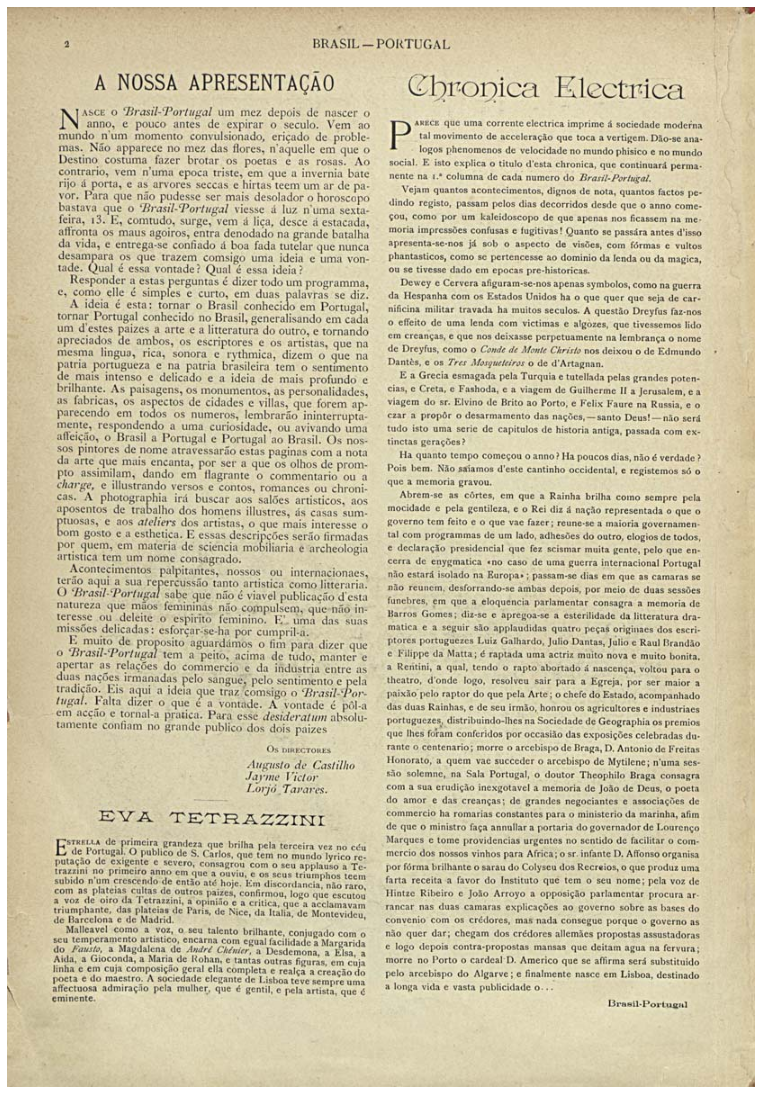

In [12]:
#display image with matplotlib

def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()
    
display(im_file)

In [ ]:
#preprocessing Diário de Lisboa



In [23]:
import imutils
img = imutils.url_to_image('http://casacomum.org/aebdocs/05/05755/05755.019.04954/d2/05755.019.04954_p0002_id000617765_D2.png')

In [29]:
#beautiful soup - Diário de Lisboa
image = cv2.imwrite('test.jpeg',img)
image_open = Image.open(image)
print(image_open)
#cv2.imshow("image", img)

AttributeError: 'bool' object has no attribute 'read'